# Customer Churn

- [1 - Introduction](#Introduction)
    - [1.1 - Project Overview](#Project-Overview)
    - [1.2 - Problem Statement](#Problem-Statement)
    - [1.3 - Dataset Description](#Dataset-Description)

- [2 - Import Libraries](#Import-Libraries)

- [3 - Data Loading and Exploration](#Data-Loading-and-Exploration)
    - [3.1 - Load the Dataset](#Load-the-Dataset)
    - [3.2 - Display Basic Information](#Display-Basic-Information)
    - [3.3 - Show Summary Statistics](#Show-Summary-Statistics)
    
- [4 - Data Preprocessing](#Data-Preprocessing)
    - [4.1 - Handle Missing Values](#Handle-Missing-Values)
    - [4.2 - Encode Categorical Variables](#Encode-Categorical-Variables)
    - [4.3 - Feature Scaling](#Feature-Scaling)

- [5 - Data Splitting](#Data-Splitting)
    - [5.1 - Split into Train, Validation, and Test Sets](#Split-into-Train-Validation-and-Test-Sets)
    - [5.2 - Split Data into Features (X) and Target (y)](#Split-Data-into-Features-X-and-Target-y)


- [6 - Model Definition](#Model-Definition)
    - [6.1 - Define the Logistic Regression Model using Sklearn](#Define-the-Logistic-Regression-Model-using-Sklearn)

- [7 - Model Training](#Model-Training)
    - [7.1 - Set Up Loss Function and Optimizer](#Set-Up-Loss-Function-and-Optimizer)
    - [7.2 - Training Loop](#Training-Loop)
    - [7.3 - Validation During Training](#Validation-During-Training)

- [8 - Model Evaluation](#Model-Evaluation)

- [9 - Conclusion and Future Work](#Conclusion-and-Future-Work)

- [10 - References](#References)



# [1 - Introduction](#Introduction)

## [1.1 - Project Overview](#Project-Overview)
The goal of this project is to develop a predictive model that can identify customers who are likely to churn. Customer churn, or customer attrition, refers to the loss of clients or customers. Predicting customer churn is crucial for businesses as it helps in retaining customers, improving customer satisfaction, and increasing profitability. By analyzing various customer-related data, we aim to build a machine learning model that can effectively predict the likelihood of a customer leaving the service.

## [1.2 - Problem Statement](#Problem-Statement)
Customer churn is a significant problem for businesses, leading to a loss in revenue and increased costs for acquiring new customers. The challenge lies in identifying which customers are at risk of churning before they actually do. This project aims to address the following questions:

1. Can we build an accurate model to predict customer churn using historical customer data?
2. How can we interpret the model's predictions to provide actionable insights for the business to reduce churn rates?

By addressing these questions, we aim to provide a valuable tool for businesses to proactively manage customer relationships and improve retention strategies.

## [1.3 - Dataset Description](#Dataset-Description)
The dataset used in this project is sourced from Kaggle and pertains to a fictional telco company that provided home phone and Internet services to 7043 customers in California.

### Telco Customer Churn
Each row in the dataset represents a customer, and each column contains various attributes describing the customers, as detailed in the column metadata.

- **Number of Rows:** 7043 (customers)
- **Number of Columns:** 21 (features)
- **Target Column:** "Churn"

### Data Composition
The dataset includes the following information:

- **Churn Information:**
  - Customers who left within the last month (indicated in the "Churn" column).

- **Services Signed Up:**
  - Phone service, multiple lines, internet service, online security, online backup, device protection, tech support, streaming TV, and streaming movies.

- **Customer Account Information:**
  - Duration of customer relationship, contract type, payment method, paperless billing, monthly charges, and total charges.

- **Demographic Information:**
  - Gender, age range, and whether the customer has partners and dependents..



# [2 - Import Libraries](#Import-Libraries)

In this section, we import the necessary libraries required for data manipulation, visualization, and building a machine learning model using Sklearn.


In [20]:
# Basic libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sklearn for data preprocessing, building, training the model and evaluation
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc

## [4.4 - Split Data into Features (X) and Target (y)](#Split-Data-into-Features-X-and-Target-y)

In this section, we will divide our dataset into two main components: Features (X) and the target variable (y). The features (X) consist of all the independent variables that will be used as input to the model, while the target variable (y) represents the outcome we aim to predict—in this case, customer churn. This separation is crucial for training and evaluating the model effectively.



# [3 - Data Loading and Exploration](#Data-Loading-and-Exploration)

## [3.1 - Load the Dataset](#Load-the-Dataset)

In this section, we will load the Telco Customer Churn dataset into a pandas DataFrame for further exploration and analysis.

In [21]:
# Load the dataset into a pandas DataFrame
data_path = './WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(data_path)

# Display the first few rows of the dataset to verify loading
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## [3.2 - Display Basic Information](#Display-Basic-Information)

In this section, we will display basic information about the dataset to understand its structure and contents.


In [22]:
# Display the basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## [3.3 - Summary Statistics](#Show-Summary-Statistics)

In this section, we will present detailed statistics about the customers in the dataset. 
These statistics provide insights into the characteristics and demographics of the customer base, helping to better understand the types of customers represented.


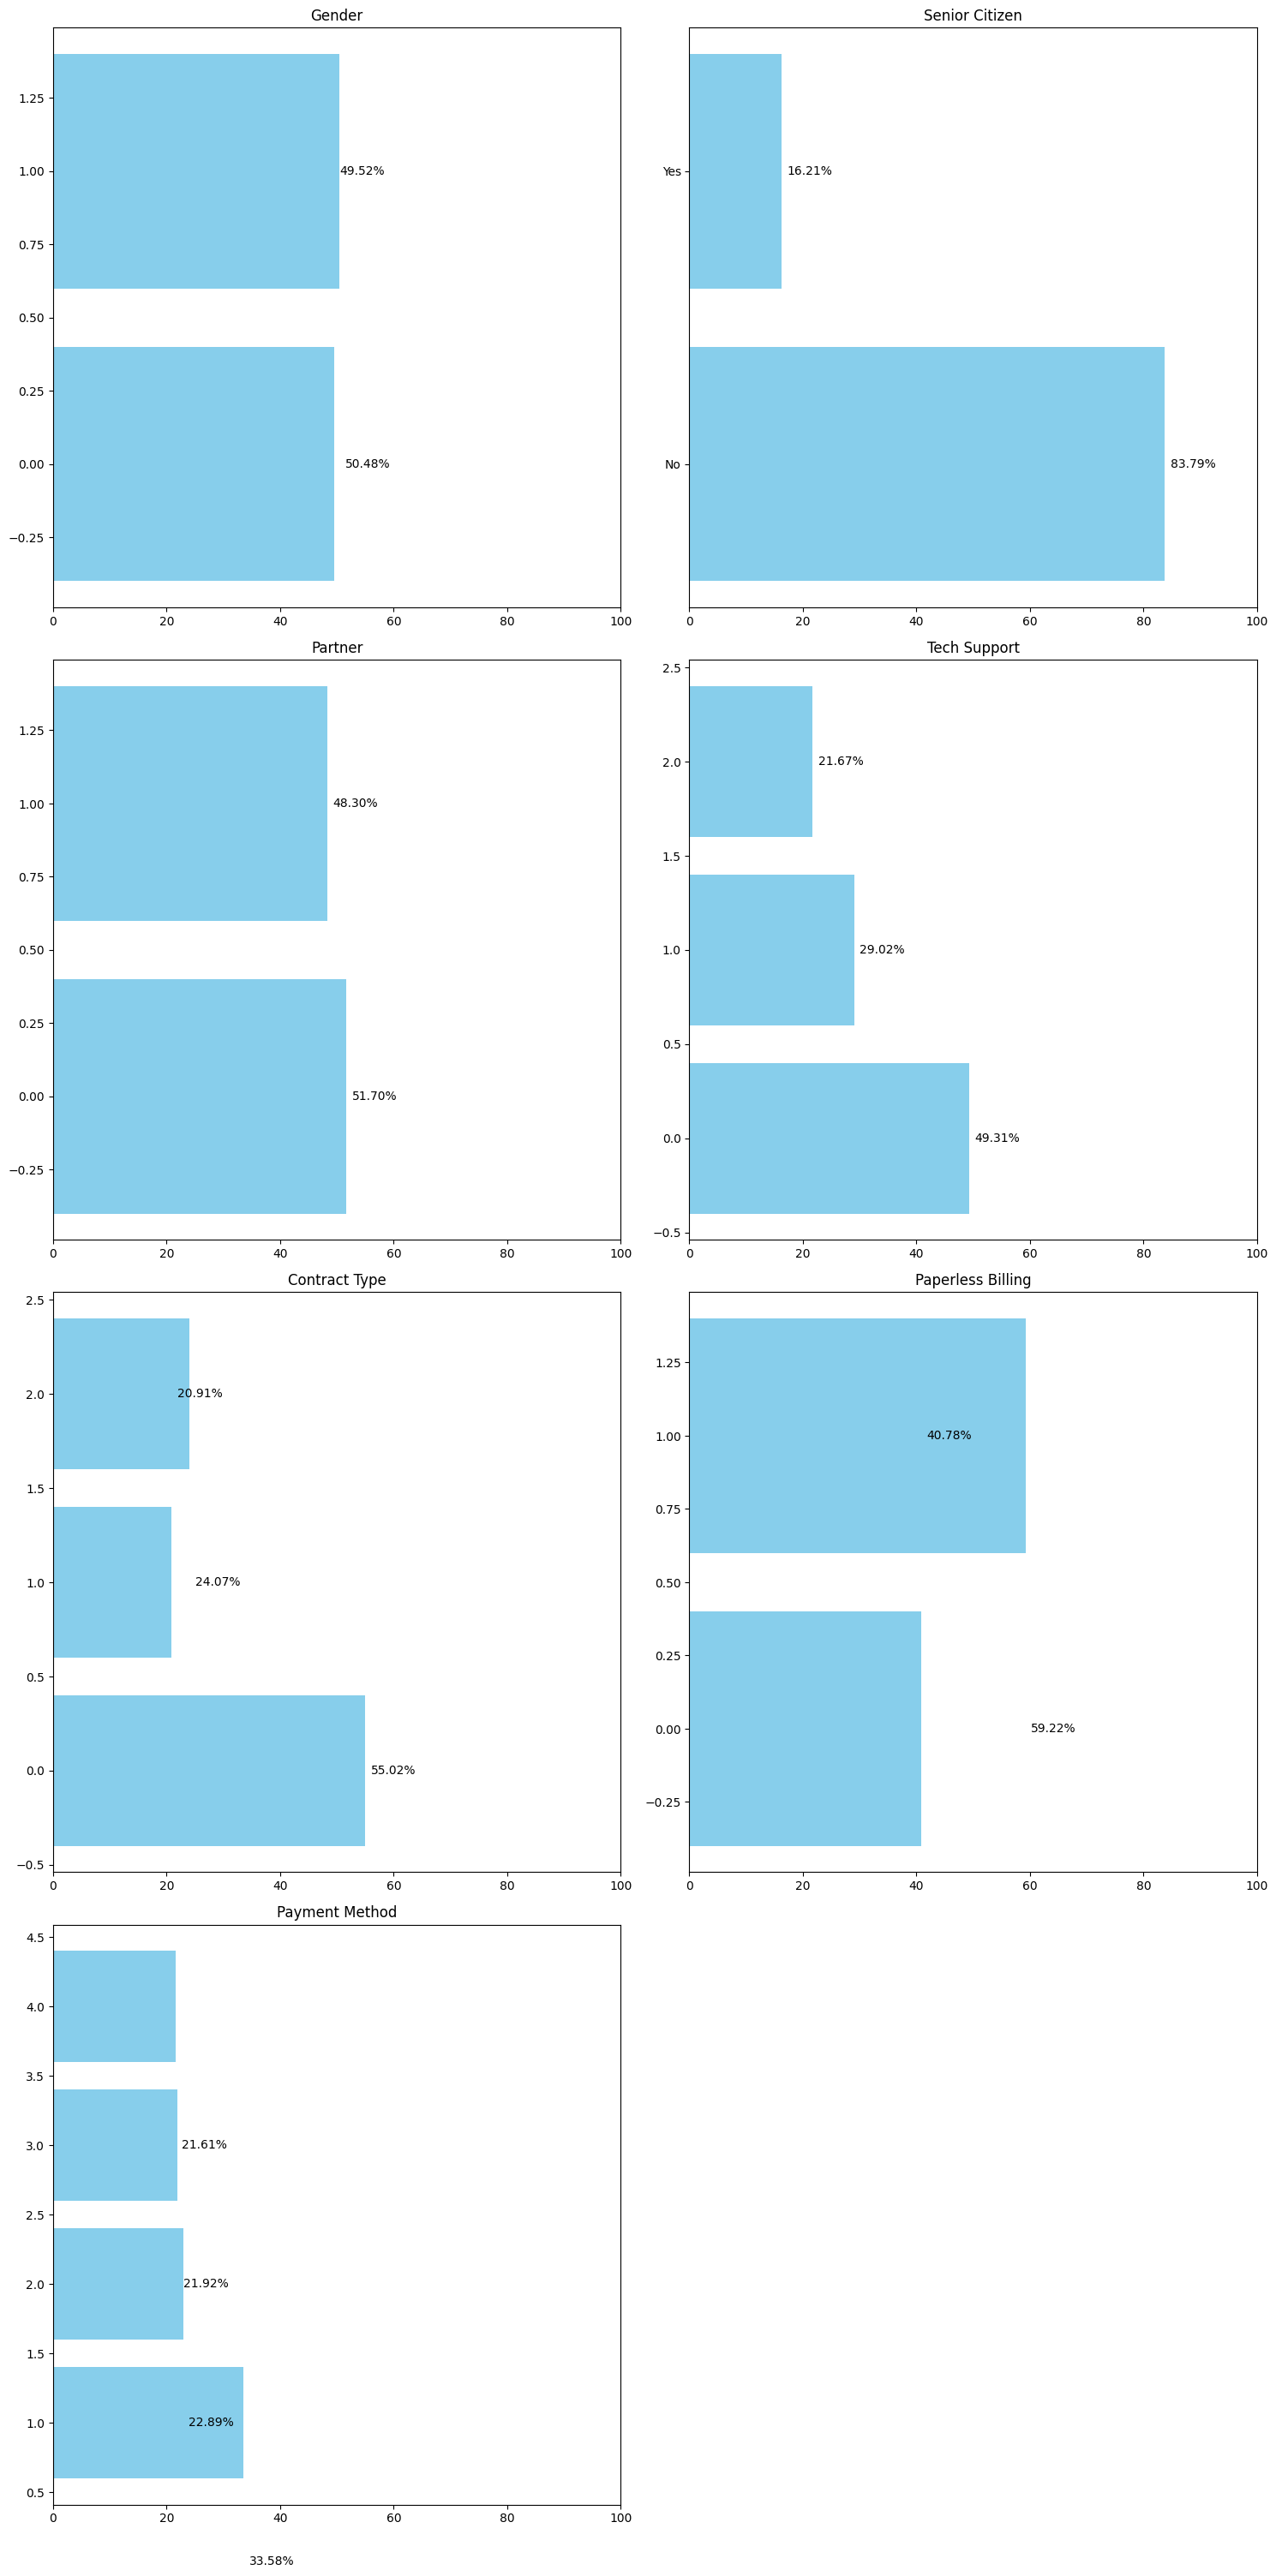

In [34]:
# Prepare data for plotting
categories = [
    "Gender", "Senior Citizen", "Partner", "Tech Support", 
    "Contract Type", "Paperless Billing", "Payment Method", "Churn"
]

# Create a dictionary to store distributions
distributions = {
    "Gender": df['gender'].value_counts(normalize=True) * 100,
    "Senior Citizen": df['SeniorCitizen'].replace({1: 'Yes', 0: 'No'}).value_counts(normalize=True) * 100,
    "Partner": df['Partner'].value_counts(normalize=True) * 100,
    "Tech Support": df['TechSupport'].value_counts(normalize=True) * 100,
    "Contract Type": df['Contract'].value_counts(normalize=True) * 100,
    "Paperless Billing": df['PaperlessBilling'].value_counts(normalize=True) * 100,
    "Payment Method": df['PaymentMethod'].value_counts(normalize=True) * 100,
    "Churn": df['Churn'].value_counts(normalize=True) * 100

}

# Plot the distributions
fig, axs = plt.subplots(4, 2, figsize=(15, 30))
axs = axs.flatten()

for i, category in enumerate(categories):
    distribution = distributions[category]
    axs[i].barh(distribution.index, distribution.values, color='skyblue')
    axs[i].set_title(category)
    axs[i].set_xlim(0, 100)
    for j in range(len(distribution)):
        axs[i].text(distribution.values[j] + 1, j, f"{distribution.values[j]:.2f}%", va='center')

# Hide the last subplot if categories are odd in number
if len(categories) % 2 != 0:
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

# [4 - Data Preprocessing](#Data-Preprocessing)

## [4.1 - Handle Missing Values](#Handle-Missing-Values)

In this section, we will identify and handle missing values in the dataset to ensure the data is clean and ready for modeling.

In [24]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In this section, we examined the dataset for any missing values. After conducting the analysis, we found that there are no missing values in any of the columns. 
This indicates that the dataset is complete, and no further action is needed to handle missing data.

## [4.2 - Encode Categorical Variables](#Encode-Categorical-Variables)

In this section, we will remove the `customerID` column and encode the categorical variables in the dataset to prepare them for modeling.



In [25]:
# Remove the customerID column
df = df.drop(columns=['customerID'])

# Gender
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

# Senior Citizen
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 1, 0: 0})

# Partner
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

# Dependents
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

# PhoneService
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

# MultipleLines
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})

# InternetService
df['InternetService'] = df['InternetService'].map({'DSL': 1, 'Fiber optic': 2, 'No': 0})

# OnlineSecurity
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

# OnlineBackup
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

# DeviceProtection
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

# TechSupport
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

# StreamingTV
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

# StreamingMovies
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

# Contract
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

# PaperlessBilling
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# PaymentMethod
df['PaymentMethod'] = df['PaymentMethod'].map({
    'Electronic check': 1, 
    'Mailed check': 2, 
    'Bank transfer (automatic)': 3, 
    'Credit card (automatic)': 4
})

# Cast TotalCharges to numerical data type
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Churn
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Display the first few rows to verify
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,3,42.30,1840.75,0
4,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,1,70.70,151.65,1


## [4.3 - Feature Scaling](#Feature-Scaling)

In this section, we will apply feature scaling and normalization to ensure that all features contribute equally to the model, as algorithms like logistic regression can be sensitive to the scale of input data. This step is crucial to improve the model's performance by preventing features with larger ranges from dominating the learning process.

In [26]:
def filter_columns_to_scale(df):
    # Select numerical columns (float and int types)
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Filter out binary columns (those with only two unique values)
    columns_to_scale = [col for col in numerical_columns if df[col].nunique() > 4]
    
    return columns_to_scale

# Apply the function to the dataframe
columns_to_scale = filter_columns_to_scale(df)

# Display the columns that need to be scaled
print("Columns to be scaled:")
print(columns_to_scale)


Columns to be scaled:
['tenure', 'MonthlyCharges', 'TotalCharges']


We will now scale the Tenure, MonthlyCharges, and TotalCharges features by using Z-score Normalization to ensure consistent input ranges, which is important for the model's performance.

In [27]:
# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Apply Z-Score normalization to the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows to verify the scaling
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,2,1,0,1,0,0,0,0,0,1,1,-1.160323,-0.994194,0
1,1,0,0,0,0.066327,1,0,1,1,0,1,0,0,0,1,0,2,-0.259629,-0.173740,0
2,1,0,0,0,-1.236724,1,0,1,1,1,0,0,0,0,0,1,2,-0.362660,-0.959649,1
3,1,0,0,0,0.514251,0,2,1,1,0,1,1,0,0,1,0,3,-0.746535,-0.195248,0
4,0,0,0,0,-1.236724,1,0,2,0,0,0,0,0,0,0,1,1,0.197365,-0.940457,1


# [5 - Data Splitting](#Data-Splitting)

## [5.1 Split into Train, Validation, and Test Sets](#Split-into-Train-Validation-and-Test-Sets)


In this chapter, we will split the dataset into training, validation, and testing sets. 
This step is essential to evaluate the model's performance, tune hyperparameters, and ensure its generalizability to unseen data.


In [28]:
# First, split the data into training + validation and test sets (80% train+validation, 20% test)
train_val_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['Churn'])

# Next, split the training + validation set into separate training and validation sets (75% train, 25% validation)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state=42, stratify=train_val_df['Churn'])

# Display the sizes of each set to verify the split
print("Training set size:", len(train_df))
print("Validation set size:", len(val_df))
print("Test set size:", len(test_df))

Training set size: 4225
Validation set size: 1409
Test set size: 1409


## [5.2 - Split Data into Features (X) and Target (y)](#Split-Data-into-Features-X-and-Target-y)

In this section, we will divide our dataset into two main components: Features (X) and the target variable (y). The features (X) consist of all the independent variables that will be used as input to the model, while the target variable (y) represents the outcome we aim to predict—in this case, customer churn. This separation is crucial for training and evaluating the model effectively.



In [ ]:
# Define the target column
target_column = 'Churn'

# Split the training set into features (X_train) and target (y_train)
X_train = train_df.drop(columns=[target_column])
y_train = train_df[target_column].astype(int)

# Split the validation set into features (X_val) and target (y_val)
X_val = val_df.drop(columns=[target_column])
y_val = val_df[target_column].astype(int)

# Split the test set into features (X_test) and target (y_test)
X_test = test_df.drop(columns=[target_column])
y_test = test_df[target_column].astype(int)

# Display the first few rows of each to verify
print("Training features (X_train):")
print(X_train.head())
print("\nTraining target (y_train):")
print(y_train.head())

print("\nValidation features (X_val):")
print(X_val.head())
print("\nValidation target (y_val):")
print(y_val.head())

print("\nTest features (X_test):")
print(X_test.head())
print("\nTest target (y_test):")
print(y_test.head())